In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.float_format", lambda x: "%.2f" % x)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from helpers import *

In [2]:
salary = pd.read_csv("./hitters.csv")
df = salary.copy()

In [3]:
check_df(df)

##################### Shape #####################
(322, 20)
##################### Types #####################
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object
##################### Head #####################
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    32

In [4]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [5]:
cat_cols
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [6]:
for col in num_cols:
    print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun True
Runs True
RBI True
Walks True
Years True
CAtBat True
CHits True
CHmRun True
CRuns True
CRBI True
CWalks True
PutOuts True
Assists True
Errors True
Salary True


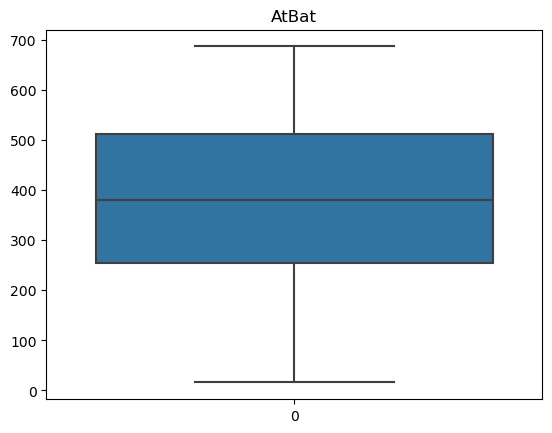

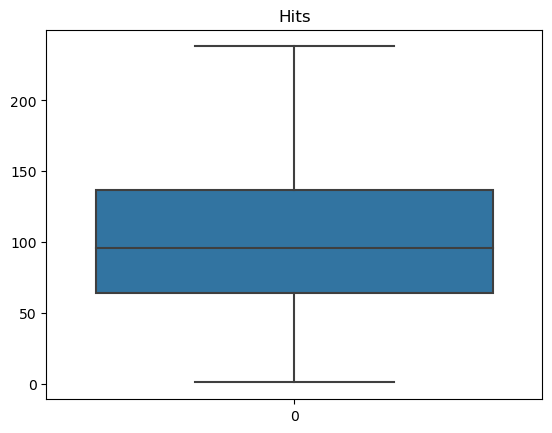

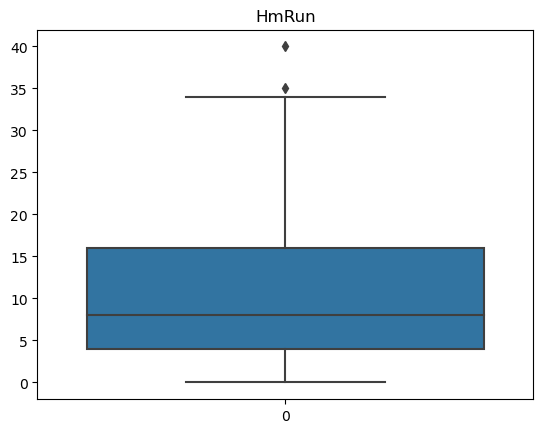

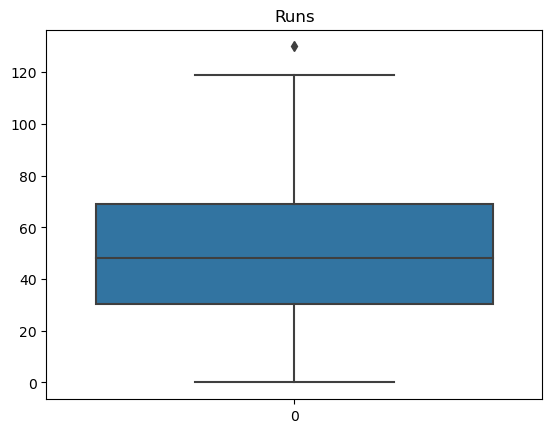

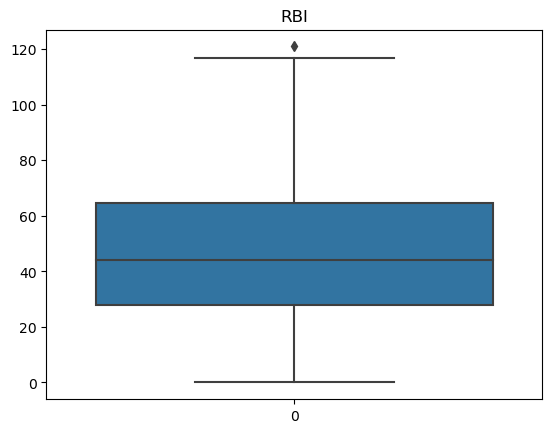

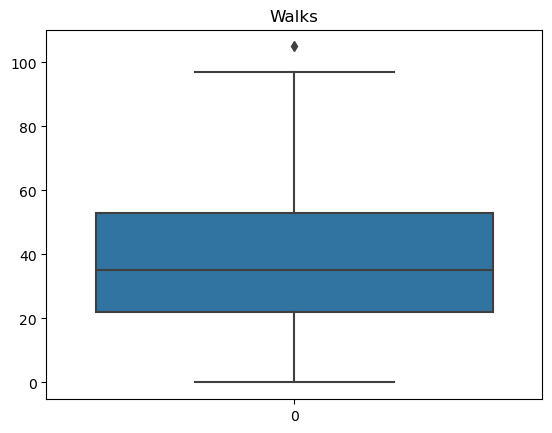

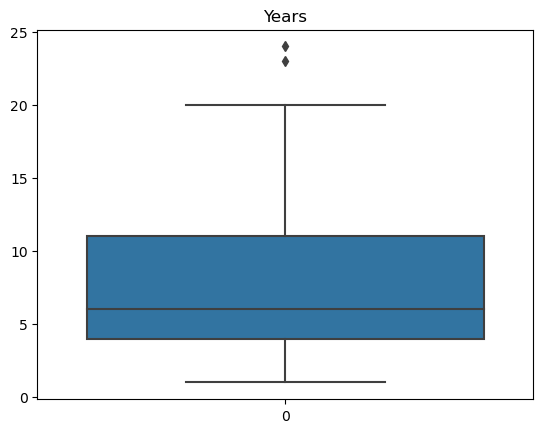

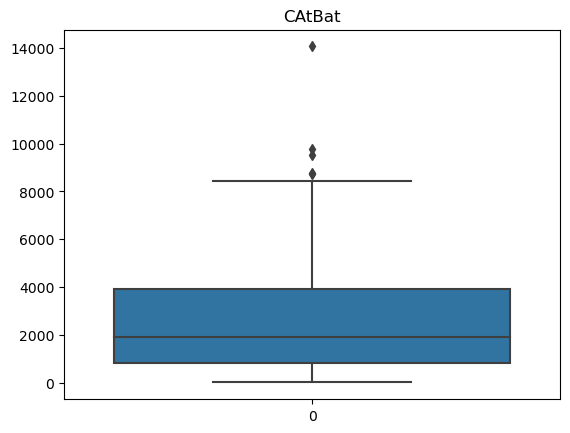

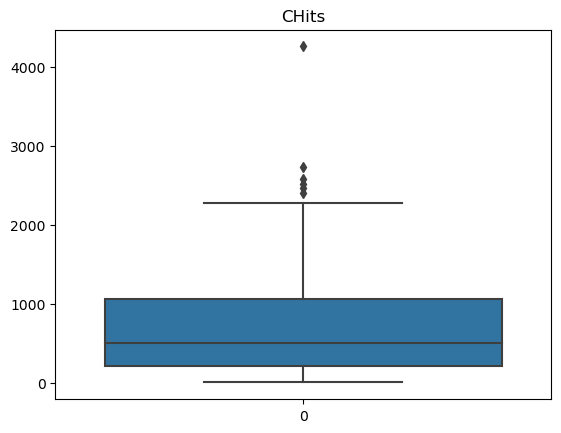

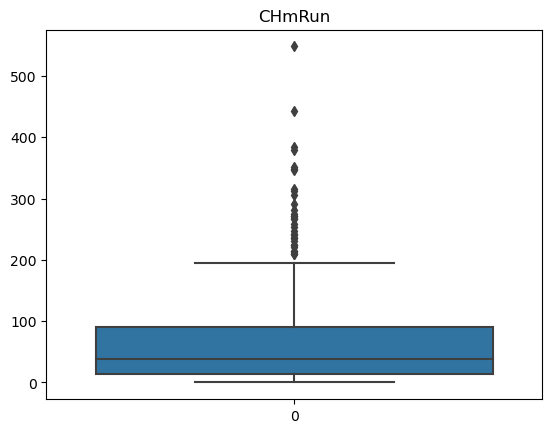

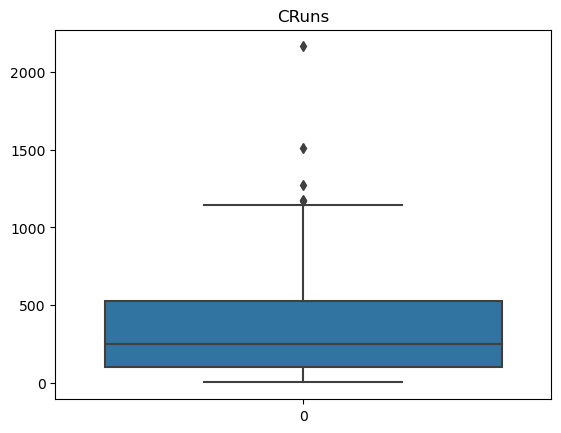

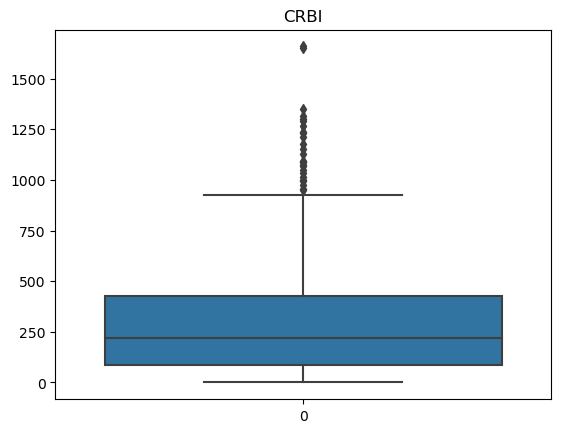

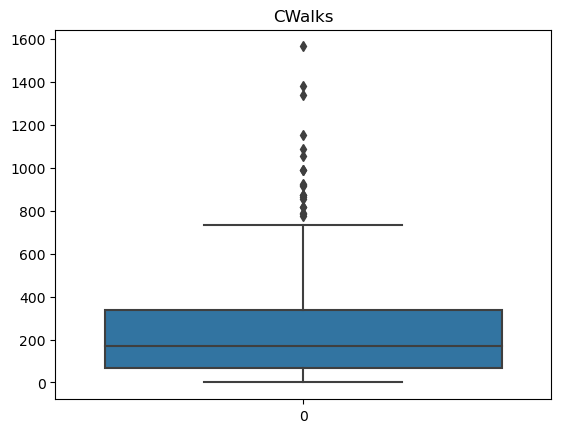

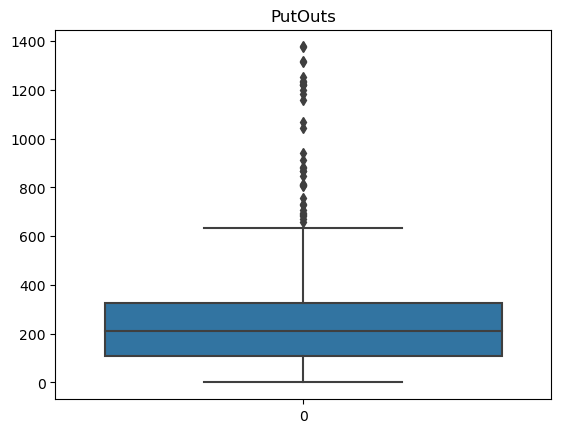

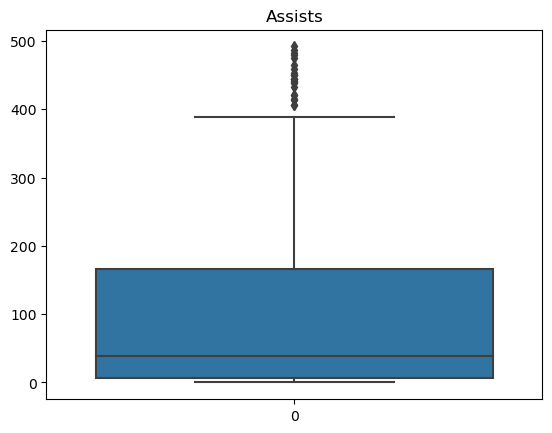

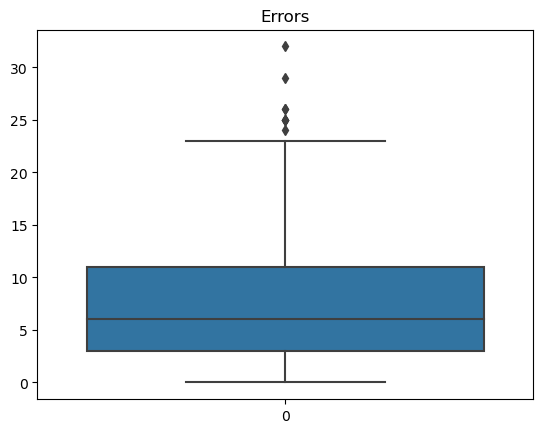

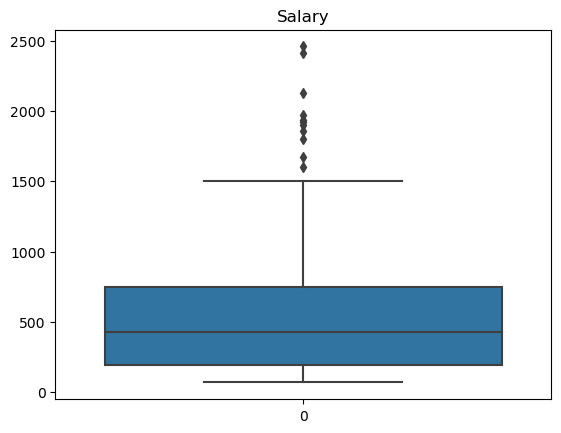

In [7]:
for col in num_cols:
    plt.title(col)
    sns.boxplot(df[col])
    plt.show(block=True)

In [8]:
for col in num_cols:
    print(col, check_outlier(df, col, q1=0.1, q3=0.9))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits True
CHmRun True
CRuns False
CRBI False
CWalks True
PutOuts False
Assists False
Errors False
Salary False


In [9]:
for col in num_cols:
    if check_outlier(df, col, q1=0.1, q3=0.9):
        replace_with_thresholds(df, col, q1=0.1, q3=0.9)

   League  Ratio
A     175  54.35
N     147  45.65
##########################################


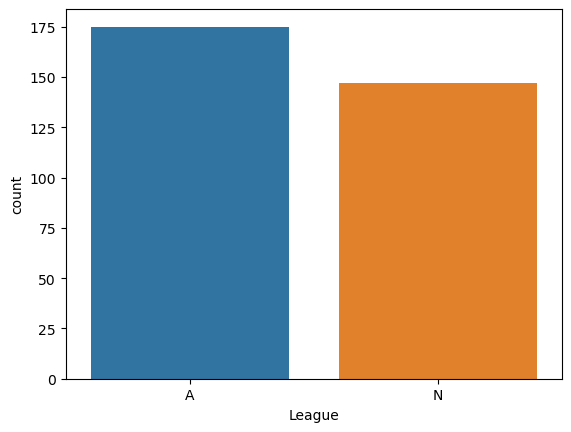

   Division  Ratio
W       165  51.24
E       157  48.76
##########################################


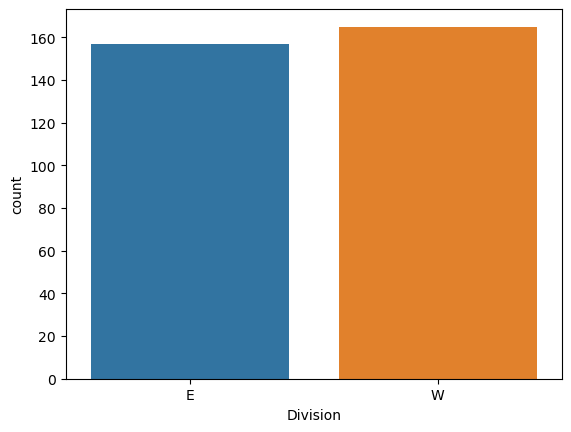

   NewLeague  Ratio
A        176  54.66
N        146  45.34
##########################################


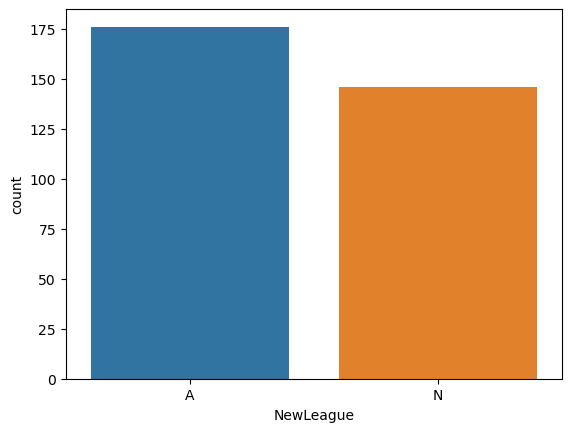

In [10]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

count   322.00
mean    380.93
std     153.40
min      16.00
5%      161.00
10%     194.10
20%     221.80
30%     281.30
40%     321.80
50%     379.50
60%     430.20
70%     490.00
80%     535.60
90%     584.90
95%     609.90
99%     658.59
max     687.00
Name: AtBat, dtype: float64


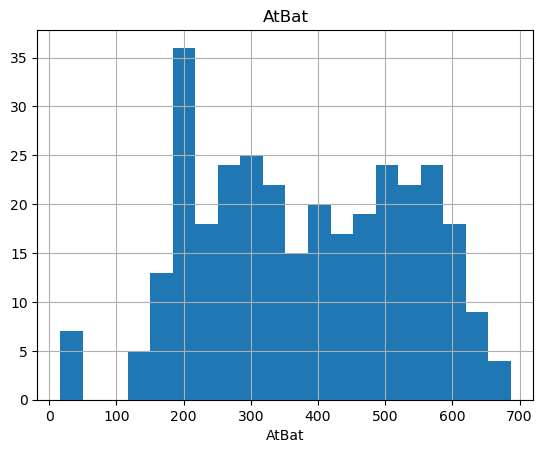

count   322.00
mean    101.02
std      46.45
min       1.00
5%       39.00
10%      45.10
20%      57.00
30%      70.00
40%      82.00
50%      96.00
60%     113.00
70%     128.70
80%     144.00
90%     163.00
95%     174.00
99%     210.79
max     238.00
Name: Hits, dtype: float64


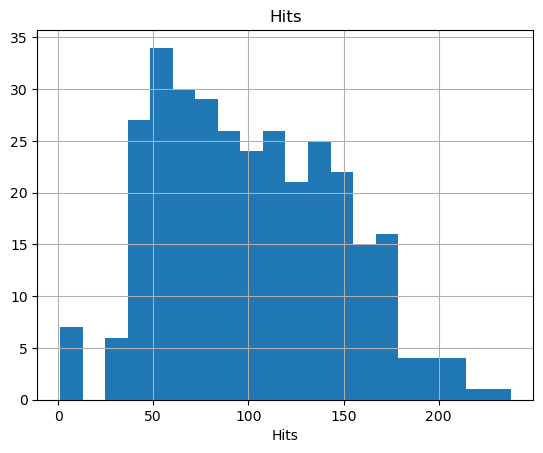

count   322.00
mean     10.77
std       8.71
min       0.00
5%        0.00
10%       1.00
20%       3.00
30%       5.00
40%       6.00
50%       8.00
60%      10.60
70%      14.00
80%      18.00
90%      24.00
95%      28.95
99%      33.00
max      40.00
Name: HmRun, dtype: float64


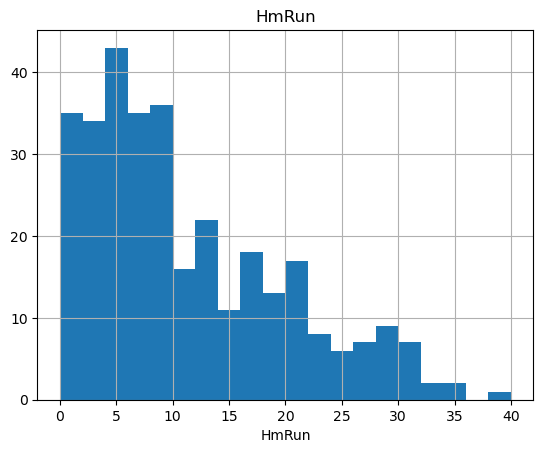

count   322.00
mean     50.91
std      26.02
min       0.00
5%       17.00
10%      20.10
20%      27.00
30%      33.00
40%      41.00
50%      48.00
60%      55.60
70%      66.00
80%      75.80
90%      89.00
95%      94.00
99%     107.79
max     130.00
Name: Runs, dtype: float64


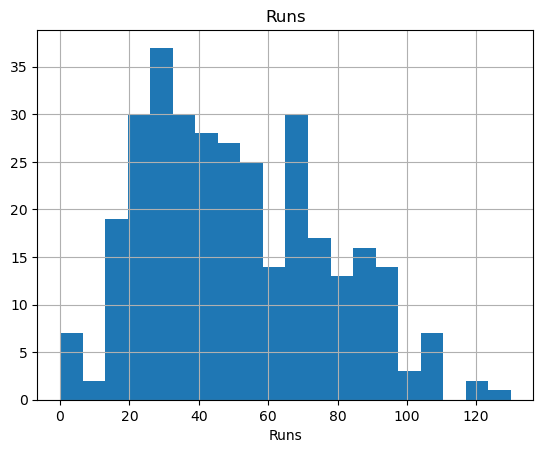

count   322.00
mean     48.03
std      26.17
min       0.00
5%       14.00
10%      19.00
20%      26.00
30%      30.00
40%      36.40
50%      44.00
60%      49.00
70%      58.00
80%      73.00
90%      86.00
95%      96.00
99%     112.37
max     121.00
Name: RBI, dtype: float64


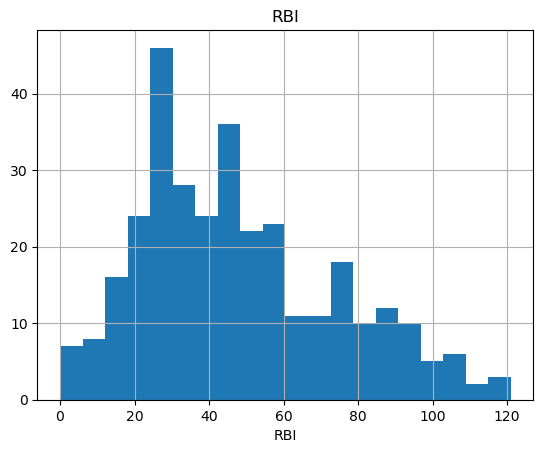

count   322.00
mean     38.74
std      21.64
min       0.00
5%       11.05
10%      15.00
20%      20.00
30%      24.00
40%      30.00
50%      35.00
60%      40.00
70%      48.70
80%      59.00
90%      69.90
95%      78.00
99%      93.58
max     105.00
Name: Walks, dtype: float64


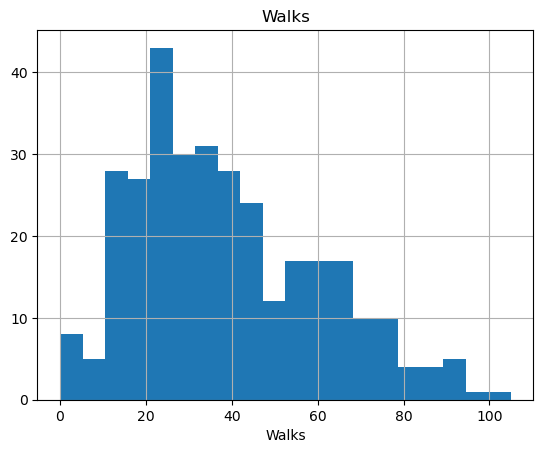

count   322.00
mean      7.44
std       4.93
min       1.00
5%        1.00
10%       2.00
20%       3.00
30%       4.00
40%       5.00
50%       6.00
60%       7.60
70%      10.00
80%      12.00
90%      15.00
95%      17.00
99%      19.79
max      24.00
Name: Years, dtype: float64


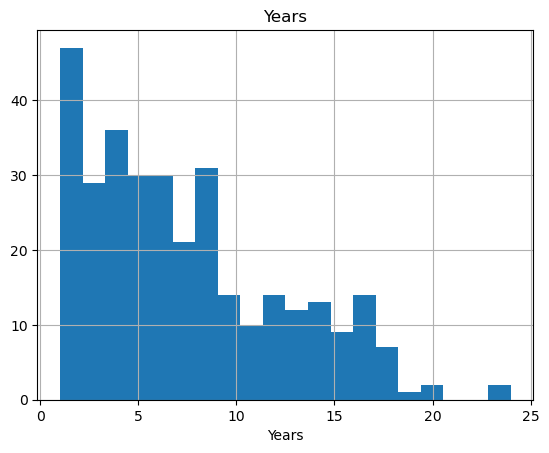

count     322.00
mean     2648.68
std      2324.21
min        19.00
5%        216.50
10%       342.20
20%       667.60
30%       963.40
40%      1402.20
50%      1928.00
60%      2654.00
70%      3365.00
80%      4483.00
90%      6123.40
95%      7125.60
99%      8749.97
max     14053.00
Name: CAtBat, dtype: float64


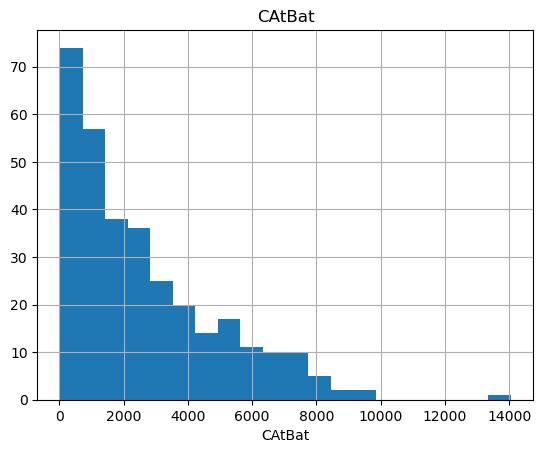

count    322.00
mean     716.84
std      650.62
min        4.00
5%        54.00
10%       86.00
20%      164.60
30%      238.00
40%      355.80
50%      508.00
60%      708.20
70%      911.10
80%     1229.20
90%     1659.60
95%     2017.15
99%     2500.34
max     4020.00
Name: CHits, dtype: float64


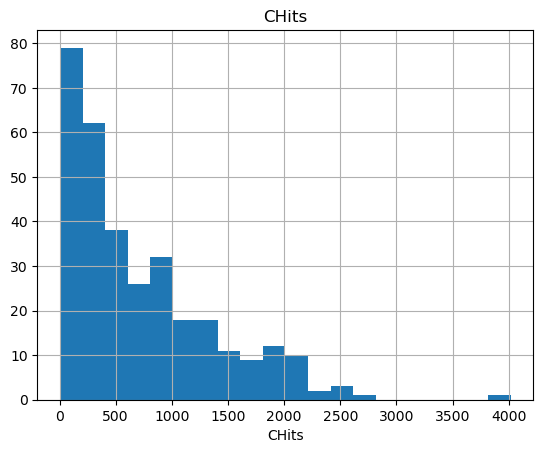

count   322.00
mean     69.28
std      85.19
min       0.00
5%        2.00
10%       4.00
20%      10.20
30%      16.30
40%      27.40
50%      37.50
60%      51.20
70%      72.40
80%     103.80
90%     194.90
95%     265.65
99%     373.12
max     481.25
Name: CHmRun, dtype: float64


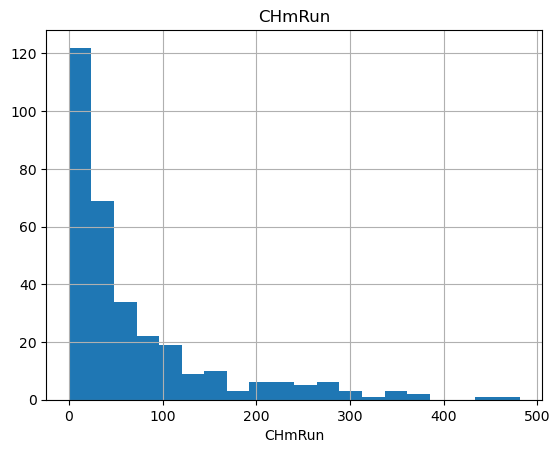

count    322.00
mean     358.80
std      334.11
min        1.00
5%        27.00
10%       38.10
20%       80.40
30%      117.30
40%      181.00
50%      247.00
60%      333.00
70%      443.40
80%      627.20
90%      895.70
95%     1032.30
99%     1174.37
max     2165.00
Name: CRuns, dtype: float64


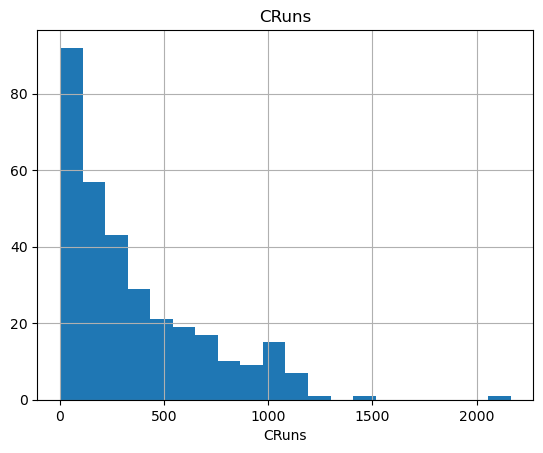

count    322.00
mean     330.12
std      333.22
min        0.00
5%        22.05
10%       34.10
20%       70.20
30%      106.30
40%      149.00
50%      220.50
60%      303.60
70%      379.10
80%      496.20
90%      861.60
95%     1071.75
99%     1310.85
max     1659.00
Name: CRBI, dtype: float64


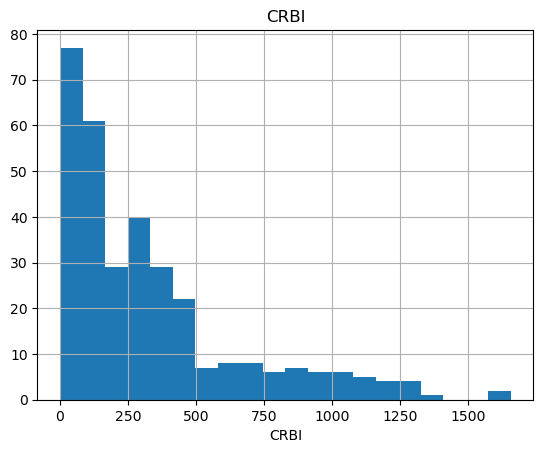

count    322.00
mean     260.23
std      267.04
min        0.00
5%        15.05
10%       30.10
20%       55.00
30%       82.00
40%      117.40
50%      170.50
60%      226.60
70%      300.70
80%      421.00
90%      643.90
95%      817.60
99%     1139.14
max     1564.60
Name: CWalks, dtype: float64


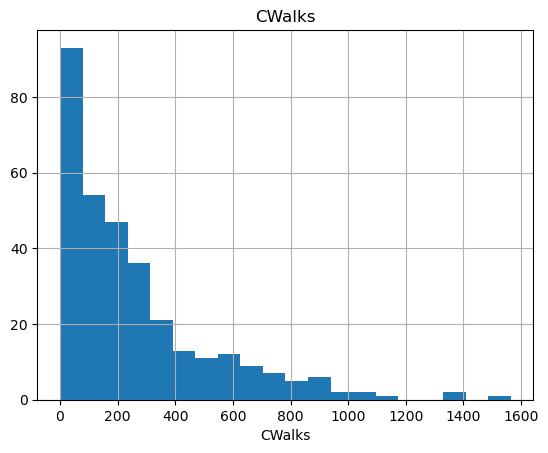

count    322.00
mean     288.94
std      280.70
min        0.00
5%        33.20
10%       62.20
20%       99.60
30%      132.00
40%      167.00
50%      212.00
60%      257.40
70%      303.00
80%      365.80
90%      685.60
95%      910.65
99%     1301.19
max     1378.00
Name: PutOuts, dtype: float64


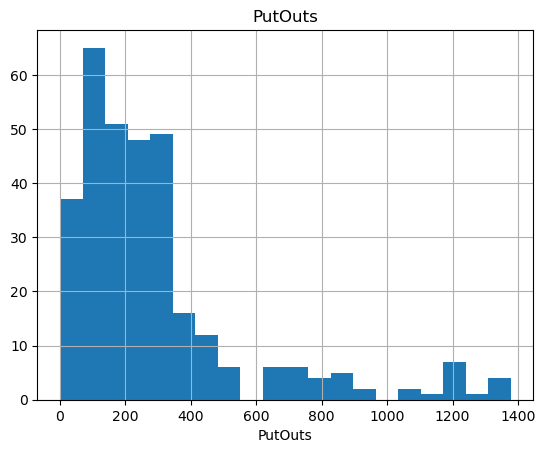

count   322.00
mean    106.91
std     136.85
min       0.00
5%        0.00
10%       2.00
20%       5.20
30%       9.00
40%      15.40
50%      39.50
60%      76.80
70%     134.80
80%     210.80
90%     353.30
95%     431.45
99%     478.16
max     492.00
Name: Assists, dtype: float64


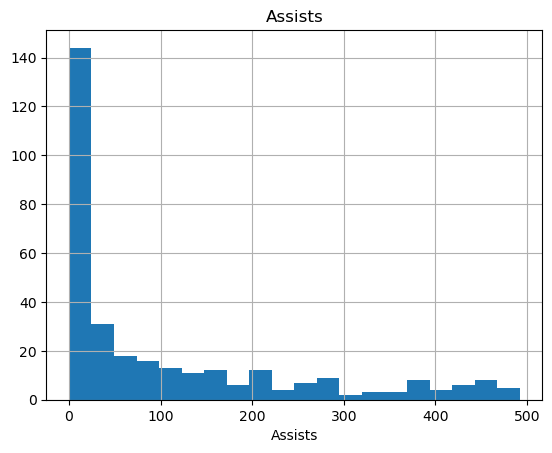

count   322.00
mean      8.04
std       6.37
min       0.00
5%        0.00
10%       1.00
20%       3.00
30%       4.00
40%       5.00
50%       6.00
60%       8.00
70%      10.00
80%      13.00
90%      17.00
95%      20.00
99%      25.79
max      32.00
Name: Errors, dtype: float64


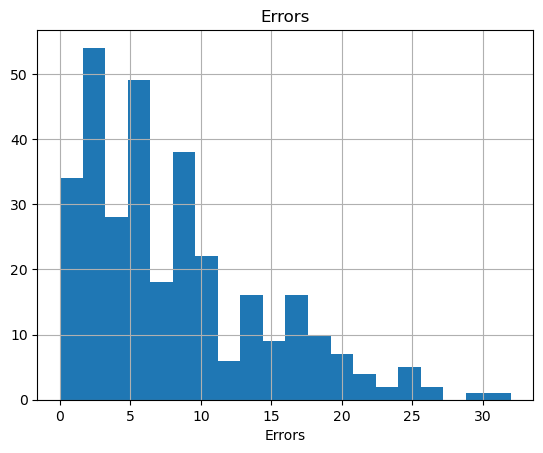

count    263.00
mean     535.93
std      451.12
min       67.50
5%        86.60
10%      100.00
20%      155.00
30%      221.00
40%      300.00
50%      425.00
60%      538.00
70%      700.00
80%      809.00
90%     1048.67
95%     1346.00
99%     2032.89
max     2460.00
Name: Salary, dtype: float64


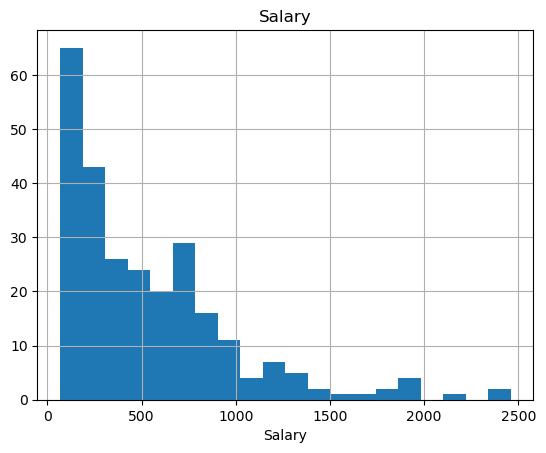

In [11]:
for col in num_cols:
    num_summary(df, col, plot=True)

In [12]:
for col in cat_cols:
    target_summary_with_cat(df, "Salary", col)

        TARGET_MEAN
League             
A            542.00
N            529.12


          TARGET_MEAN
Division             
E              624.27
W              450.88


           TARGET_MEAN
NewLeague             
A               537.11
N               534.55




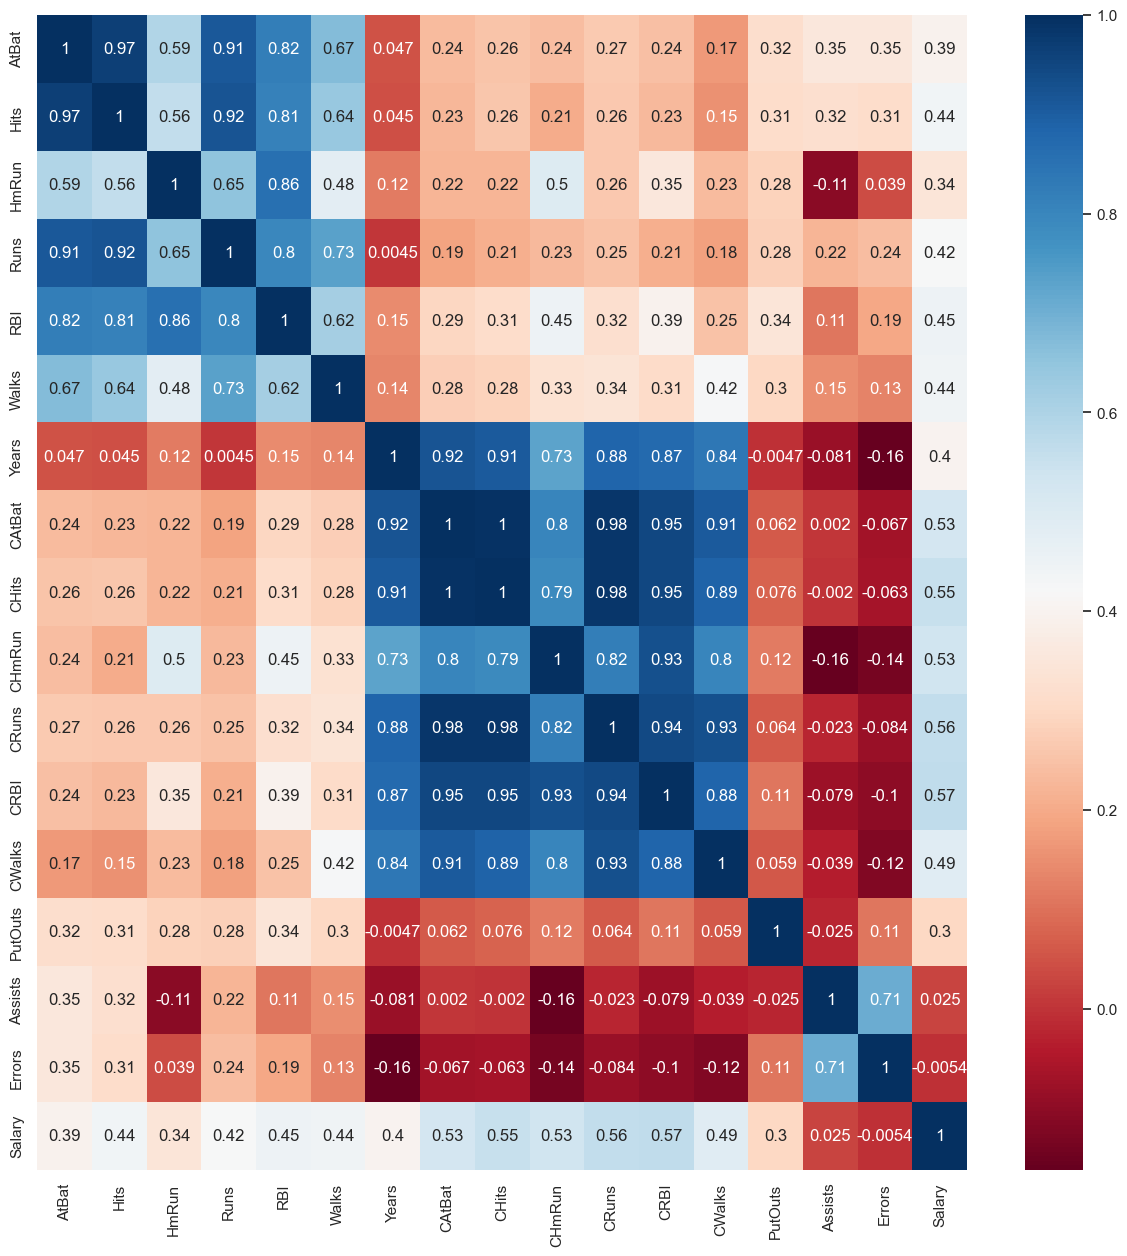

['Hits', 'Runs', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks']

In [13]:
high_correlated_cols(df, plot=True)

In [14]:
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [15]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols
new_num_cols = [col for col in num_cols if col not in ["Salary", "Years"]]
df[new_num_cols] = df[new_num_cols] + 1
df.columns = [col.upper() for col in df.columns]
cat_cols, num_cols, cat_but_car = grab_col_names(df)
# RATIO OF VARIABLES
# CAREER RUNS RATIO

df["NEW_C_RUNS_RATIO"] = df["RUNS"] / df["CRUNS"]
# CAREER BAT RATIO

df["NEW_C_ATBAT_RATIO"] = df["ATBAT"] / df["CATBAT"]
# CAREER HITS RATIO

df["NEW_C_HITS_RATIO"] = df["HITS"] / df["CHITS"]
# CAREER HMRUN RATIO

df["NEW_C_HMRUN_RATIO"] = df["HMRUN"] / df["CHMRUN"]
# CAREER RBI RATIO

df["NEW_C_RBI_RATIO"] = df["RBI"] / df["CRBI"]
# CAREER WALKS RATIO

df["NEW_C_WALKS_RATIO"] = df["WALKS"] / df["CWALKS"]
df["NEW_C_HIT_RATE"] = df["CHITS"] / df["CATBAT"]
# PLAYER TYPE : RUNNER

df["NEW_C_RUNNER"] = df["CRBI"] / df["CHITS"]
# PLAYER TYPE : HIT AND RUN

df["NEW_C_HIT-AND-RUN"] = df["CRUNS"] / df["CHITS"]
# MOST VALUABLE HIT RATIO IN HITS

df["NEW_C_HMHITS_RATIO"] = df["CHMRUN"] / df["CHITS"]
# MOST VALUABLE HIT RATIO IN ALL SHOTS

df["NEW_C_HMATBAT_RATIO"] = df["CATBAT"] / df["CHMRUN"]
# Annual Averages

df["NEW_CATBAT_MEAN"] = df["CATBAT"] / df["YEARS"]
df["NEW_CHITS_MEAN"] = df["CHITS"] / df["YEARS"]
df["NEW_CHMRUN_MEAN"] = df["CHMRUN"] / df["YEARS"]
df["NEW_CRUNS_MEAN"] = df["CRUNS"] / df["YEARS"]
df["NEW_CRBI_MEAN"] = df["CRBI"] / df["YEARS"]
df["NEW_CWALKS_MEAN"] = df["CWALKS"] / df["YEARS"]
# PLAYER LEVEL

df.loc[(df["YEARS"] <= 2), "NEW_YEARS_LEVEL"] = "Junior"
df.loc[(df["YEARS"] > 2) & (df["YEARS"] <= 5), "NEW_YEARS_LEVEL"] = "Mid"
df.loc[(df["YEARS"] > 5) & (df["YEARS"] <= 10), "NEW_YEARS_LEVEL"] = "Senior"
df.loc[(df["YEARS"] > 10), "NEW_YEARS_LEVEL"] = "Expert"
# PLAYER LEVEL X DIVISION

df.loc[
    (df["NEW_YEARS_LEVEL"] == "Junior") & (df["DIVISION"] == "E"), "NEW_DIV_CAT"
] = "Junior-East"

df.loc[
    (df["NEW_YEARS_LEVEL"] == "Junior") & (df["DIVISION"] == "W"), "NEW_DIV_CAT"
] = "Junior-West"

df.loc[
    (df["NEW_YEARS_LEVEL"] == "Mid") & (df["DIVISION"] == "E"), "NEW_DIV_CAT"
] = "Mid-East"

df.loc[
    (df["NEW_YEARS_LEVEL"] == "Mid") & (df["DIVISION"] == "W"), "NEW_DIV_CAT"
] = "Mid-West"

df.loc[
    (df["NEW_YEARS_LEVEL"] == "Senior") & (df["DIVISION"] == "E"), "NEW_DIV_CAT"
] = "Senior-East"

df.loc[
    (df["NEW_YEARS_LEVEL"] == "Senior") & (df["DIVISION"] == "W"), "NEW_DIV_CAT"
] = "Senior-West"

df.loc[
    (df["NEW_YEARS_LEVEL"] == "Expert") & (df["DIVISION"] == "E"), "NEW_DIV_CAT"
] = "Expert-East"

df.loc[
    (df["NEW_YEARS_LEVEL"] == "Expert") & (df["DIVISION"] == "W"), "NEW_DIV_CAT"
] = "Expert-West"
# Player Promotion to Next League

df.loc[
    (df["LEAGUE"] == "N") & (df["NEWLEAGUE"] == "N"), "NEW_PLAYER_PROGRESS"
] = "StandN"

df.loc[
    (df["LEAGUE"] == "A") & (df["NEWLEAGUE"] == "A"), "NEW_PLAYER_PROGRESS"
] = "StandA"

df.loc[
    (df["LEAGUE"] == "N") & (df["NEWLEAGUE"] == "A"), "NEW_PLAYER_PROGRESS"
] = "Descend"

df.loc[
    (df["LEAGUE"] == "A") & (df["NEWLEAGUE"] == "N"), "NEW_PLAYER_PROGRESS"
] = "Ascend"

Observations: 263
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0
Observations: 263
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [16]:
num_cols
cat_cols
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 263
Variables: 40
cat_cols: 6
num_cols: 34
cat_but_car: 0
num_but_cat: 0


In [17]:
num_cols

['ATBAT',
 'HITS',
 'HMRUN',
 'RUNS',
 'RBI',
 'WALKS',
 'YEARS',
 'CATBAT',
 'CHITS',
 'CHMRUN',
 'CRUNS',
 'CRBI',
 'CWALKS',
 'PUTOUTS',
 'ASSISTS',
 'ERRORS',
 'SALARY',
 'NEW_C_RUNS_RATIO',
 'NEW_C_ATBAT_RATIO',
 'NEW_C_HITS_RATIO',
 'NEW_C_HMRUN_RATIO',
 'NEW_C_RBI_RATIO',
 'NEW_C_WALKS_RATIO',
 'NEW_C_HIT_RATE',
 'NEW_C_RUNNER',
 'NEW_C_HIT-AND-RUN',
 'NEW_C_HMHITS_RATIO',
 'NEW_C_HMATBAT_RATIO',
 'NEW_CATBAT_MEAN',
 'NEW_CHITS_MEAN',
 'NEW_CHMRUN_MEAN',
 'NEW_CRUNS_MEAN',
 'NEW_CRBI_MEAN',
 'NEW_CWALKS_MEAN']

In [18]:
cat_cols

['LEAGUE',
 'DIVISION',
 'NEWLEAGUE',
 'NEW_YEARS_LEVEL',
 'NEW_DIV_CAT',
 'NEW_PLAYER_PROGRESS']

In [19]:
binary_cols = [
    col
    for col in df.columns
    if df[col].dtype not in [int, float] and df[col].nunique() == 2
]

In [20]:
for col in binary_cols:
    df = label_encoder(df, col)

In [21]:
rare_analyser(df,"SALARY", cat_cols)
df = rare_encoder(df, 0.01, cat_cols)
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
df = one_hot_encoder(df, ohe_cols, drop_first=True)
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols.remove("SALARY")

LEAGUE : 2
   COUNT  RATIO  TARGET_MEAN
0    139   0.53       542.00
1    124   0.47       529.12


DIVISION : 2
   COUNT  RATIO  TARGET_MEAN
0    129   0.49       624.27
1    134   0.51       450.88


NEWLEAGUE : 2
   COUNT  RATIO  TARGET_MEAN
0    141   0.54       537.11
1    122   0.46       534.55


NEW_YEARS_LEVEL : 4
        COUNT  RATIO  TARGET_MEAN
Expert     65   0.25       755.11
Junior     38   0.14       186.92
Mid        78   0.30       359.34
Senior     82   0.31       691.89


NEW_DIV_CAT : 8
             COUNT  RATIO  TARGET_MEAN
Expert-East     32   0.12       809.78
Expert-West     33   0.13       702.10
Junior-East     16   0.06       229.30
Junior-West     22   0.08       156.09
Mid-East        37   0.14       427.91
Mid-West        41   0.16       297.46
Senior-East     44   0.17       798.11
Senior-West     38   0.14       568.90


NEW_PLAYER_PROGRESS : 4
         COUNT  RATIO  TARGET_MEAN
Ascend       8   0.03       558.12
Descend     10   0.04       486.00
Stand

In [22]:
for col in num_cols:
    transformer = RobustScaler().fit(df[[col]])
    df[col] = transformer.transform(df[[col]])

In [23]:
df.head()

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,...,NEW_DIV_CAT_Expert-West,NEW_DIV_CAT_Junior-East,NEW_DIV_CAT_Junior-West,NEW_DIV_CAT_Mid-East,NEW_DIV_CAT_Mid-West,NEW_DIV_CAT_Senior-East,NEW_DIV_CAT_Senior-West,NEW_PLAYER_PROGRESS_Descend,NEW_PLAYER_PROGRESS_StandA,NEW_PLAYER_PROGRESS_StandN
1,-0.40,-0.31,-0.15,-0.71,-0.22,0.06,1.33,0.50,0.38,0.37,...,1,0,0,0,0,0,0,0,0,1
2,0.27,0.39,0.69,0.35,0.61,1.15,-0.50,-0.10,-0.07,0.30,...,0,0,0,0,1,0,0,0,1,0
3,0.34,0.54,0.85,0.33,0.76,0.00,0.83,1.21,1.26,2.39,...,0,0,0,0,0,0,0,0,0,1
4,-0.38,-0.23,0.08,-0.33,-0.12,-0.21,-0.67,-0.50,-0.49,-0.36,...,0,1,0,0,0,0,0,0,0,1
5,0.74,0.94,-0.38,0.56,0.10,-0.06,0.83,0.81,0.73,-0.27,...,1,0,0,0,0,0,0,0,1,0


In [24]:
X = df.drop("SALARY", axis=1)
y = df[["SALARY"]]

In [25]:
y

,SALARY
1,475.00
2,480.00
3,500.00
4,91.50
5,750.00
...,...
317,700.00
318,875.00
319,385.00
320,960.00


In [26]:
X

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,...,NEW_DIV_CAT_Expert-West,NEW_DIV_CAT_Junior-East,NEW_DIV_CAT_Junior-West,NEW_DIV_CAT_Mid-East,NEW_DIV_CAT_Mid-West,NEW_DIV_CAT_Senior-East,NEW_DIV_CAT_Senior-West,NEW_PLAYER_PROGRESS_Descend,NEW_PLAYER_PROGRESS_StandA,NEW_PLAYER_PROGRESS_StandN
1,-0.40,-0.31,-0.15,-0.71,-0.22,0.06,1.33,0.50,0.38,0.37,...,1,0,0,0,0,0,0,0,0,1
2,0.27,0.39,0.69,0.35,0.61,1.15,-0.50,-0.10,-0.07,0.30,...,0,0,0,0,1,0,0,0,1,0
3,0.34,0.54,0.85,0.33,0.76,0.00,0.83,1.21,1.26,2.39,...,0,0,0,0,0,0,0,0,0,1
4,-0.38,-0.23,0.08,-0.33,-0.12,-0.21,-0.67,-0.50,-0.49,-0.36,...,0,1,0,0,0,0,0,0,0,1
5,0.74,0.94,-0.38,0.56,0.10,-0.06,0.83,0.81,0.73,-0.27,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.34,0.34,-0.15,0.33,0.02,0.00,-0.17,0.25,0.34,-0.10,...,0,0,0,1,0,0,0,0,0,1
318,0.32,0.47,-0.31,0.61,0.07,1.68,1.00,1.17,1.18,-0.01,...,0,0,0,0,0,0,0,0,1,0
319,0.25,0.33,-0.46,0.23,-0.10,0.44,0.00,-0.08,-0.10,-0.43,...,0,0,0,0,0,0,1,0,1,0
320,0.66,0.59,0.00,0.84,0.32,1.21,0.33,0.42,0.40,0.74,...,0,0,0,0,0,1,0,0,1,0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)

In [28]:
reg_model = LinearRegression()

In [29]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [30]:
reg_model.intercept_[0]

655.7646601452087

In [31]:
reg_model.coef_

array([[-2.45997926e+02,  2.19272219e+02, -1.05385575e+02,
         1.47336579e+02,  1.10859322e+02,  4.32869838e+01,
        -3.02517824e+02, -1.10356788e+03,  1.74893421e+03,
         2.94324414e+02, -3.28619013e+02, -4.08426082e+02,
         1.05960189e+02, -1.93076828e+01, -7.03900036e+01,
         3.55076090e+01, -3.54670064e+01,  6.26213136e+01,
         4.23854891e+01, -3.15027673e+02,  1.25470910e+03,
        -1.05470783e+03,  7.98095426e+01, -2.88847140e+02,
        -4.25060562e+01, -1.85472986e+02, -1.79538629e+00,
        -2.76695076e+01, -5.94720503e+01,  1.36426473e+01,
        -1.28642956e+03,  7.74855474e+02,  1.84776526e+01,
         2.73035290e+02,  3.30396695e+02, -2.22179798e+01,
        -3.34730834e+01, -1.48627902e+02, -2.45509691e+01,
         1.07972576e+00, -2.63490781e+01, -7.12400530e+00,
        -1.10935926e+02, -3.76919756e+01,  2.10277936e+00,
        -2.66537485e+01, -1.73738702e+01, -2.50116189e+01,
        -1.93381263e+00]])

In [32]:
np.inner(X_train.iloc[2, :].values ,reg_model.coef_) + reg_model.intercept_
y_train.iloc[2]

SALARY   600.00
Name: 23, dtype: float64

In [33]:
np.inner(X_train.iloc[4, :].values ,reg_model.coef_) + reg_model.intercept_
y_train.iloc[4]

SALARY   245.00
Name: 297, dtype: float64

In [34]:
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

204.7164645682361

In [35]:
reg_model.score(X_train, y_train)

0.786256577366203

In [36]:
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

369.0526402145812

In [37]:
reg_model.score(X_test, y_test)

0.4053255157963188

In [38]:
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X, y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))

296.7354050455539